<a href="https://colab.research.google.com/github/Arnob-Mitra/Advanced-Time-Series-Analysis-for-Cryptocurrency-Investment-using-Machine-Learning-Techniques/blob/main/Model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing necessary libraries**

In [ ]:
import os
import time
import random
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import date
import datetime as datetime
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.metrics import MeanSquaredError



In [ ]:
import numpy as np

In [ ]:
!git clone https://github.com/Es-Di-Bee/Crypto-Investment-Analysis.git

Cloning into 'Crypto-Investment-Analysis'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 26 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [ ]:
dir0='/content/Crypto-Investment-Analysis/Dataset'
files=os.listdir(dir0)
History = 60
paths=[]
for item in files:
      paths+=[os.path.join(dir0,item)]
print(paths[0:3])
files2=files.copy()

['/content/Crypto-Investment-Analysis/Dataset/coin_Dogecoin.csv', '/content/Crypto-Investment-Analysis/Dataset/coin_Ethereum.csv', '/content/Crypto-Investment-Analysis/Dataset/coin_CryptocomCoin.csv']


In [ ]:
rates=[]
for i in range(len(files)):
    data = pd.read_csv(paths[i])
    data['Date'] = pd.to_datetime(data['Date'])
    data['MA60'] = data['Close'].rolling(window=60).mean()
    data['MA60 shift year'] = data['MA60'].shift(250)
    data['Growth Rate'] = (data['MA60']-data['MA60 shift year'])*100/data['MA60 shift year']
    files[i] = data
    rates+=[[i,files2[i][5:-4],data['Growth Rate'].tolist()[-1]]]
print(rates[0:20])

[[0, 'Dogecoin', 12517.838261069477], [1, 'Ethereum', 604.610558381056], [2, 'CryptocomCoin', -14.251583516391142], [3, 'NEM', 60.75566352273505], [4, 'XRP', 282.8576832041853], [5, 'Tether', -0.08073449062918174], [6, 'WrappedBitcoin', 245.3761851968788], [7, 'Litecoin', 287.485084132313], [8, 'Iota', 330.0700005530539], [9, 'Aave', nan], [10, 'Uniswap', nan], [11, 'Cardano', 1479.798128464612], [12, 'USDCoin', -0.05972967291831417], [13, 'ChainLink', 147.78177580491044], [14, 'Tron', 186.92374148376064], [15, 'Bitcoin', 245.54462513763858], [16, 'Polkadot', 432.0370084668729], [17, 'Solana', 1250.9978248910634], [18, 'Stellar', 405.4894570514396], [19, 'Cosmos', 185.7073670997135]]


In [ ]:
dataGR=pd.DataFrame(columns=['i','Name','Growth Rate %'],data=rates)
dataGR=dataGR.dropna()
dataGR['log growth rate']=dataGR['Growth Rate %'].apply(lambda x:np.log(x))
dataGR2=dataGR.sort_values('Growth Rate %',ascending=False).reset_index(drop=True)
display(dataGR2)

,i,Name,Growth Rate %,log growth rate
0,0,Dogecoin,12517.838261,9.434910
1,11,Cardano,1479.798128,7.299661
2,20,BinanceCoin,1291.779195,7.163776
3,17,Solana,1250.997825,7.131697
4,1,Ethereum,604.610558,6.404585
5,16,Polkadot,432.037008,6.068511
6,18,Stellar,405.489457,6.005095
7,8,Iota,330.070001,5.799305
8,7,Litecoin,287.485084,5.661171
9,4,XRP,282.857683,5.644944


In [ ]:
fig = px.bar(dataGR2, x='Name', y='Growth Rate %',title="Crypto Currency Growth Rate")
fig.update_layout(width=900,height=400)              
fig.show()
fig = px.bar(dataGR2, x='Name', y='log growth rate',title="Crypto Currency LOG Growth Rate")
fig.update_layout(width=900,height=400)              
fig.show()

In [ ]:
name0='Dogecoin'  
i=dataGR2[dataGR2['Name']==name0]['i'].tolist()[0]
print(i,name0)
data=files[i]

fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data['Date'],y=data['Growth Rate'],name='Growth Rate'),secondary_y=False,)
fig.update_layout(autosize=False,width=800,height=400,title_text=name0+' Growth Rate')
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Growth Rate %",secondary_y=False)
fig.show()

0 Dogecoin


In [ ]:
name0='Cardano'  
i=dataGR2[dataGR2['Name']==name0]['i'].tolist()[0]
print(i,name0)
data=files[i]

fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data['Date'],y=data['Growth Rate'],name='Growth Rate'),secondary_y=False,)
fig.update_layout(autosize=False,width=800,height=400,title_text=name0+' Growth Rate')
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Growth Rate %",secondary_y=False)
fig.show()

11 Cardano


In [ ]:
name0='BinanceCoin'  
i=dataGR2[dataGR2['Name']==name0]['i'].tolist()[0]
print(i,name0)
data=files[i]

fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data['Date'],y=data['Growth Rate'],name='Growth Rate'),secondary_y=False,)
fig.update_layout(autosize=False,width=800,height=400,title_text=name0+' Growth Rate')
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Growth Rate %",secondary_y=False)
fig.show()

20 BinanceCoin


In [ ]:
name0='Solana'  
i=dataGR2[dataGR2['Name']==name0]['i'].tolist()[0]
print(i,name0)
data=files[i]

fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data['Date'],y=data['Growth Rate'],name='Growth Rate'),secondary_y=False,)
fig.update_layout(autosize=False,width=800,height=400,title_text=name0+' Growth Rate')
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Growth Rate %",secondary_y=False)
fig.show()

17 Solana


In [ ]:
name0='Ethereum' 
i=dataGR2[dataGR2['Name']==name0]['i'].tolist()[0]
print(i,name0)
data=files[i]

fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data['Date'],y=data['Growth Rate'],name='Growth Rate'),secondary_y=False,)
fig.update_layout(autosize=False,width=800,height=400,title_text=name0+' Growth Rate')
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Growth Rate %",secondary_y=False)
fig.show()

1 Ethereum


In [ ]:
name0='WrappedBitcoin' 
i=dataGR2[dataGR2['Name']==name0]['i'].tolist()[0]
print(i,name0)
data=files[i]

fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data['Date'],y=data['Growth Rate'],name='Growth Rate'),secondary_y=False,)
fig.update_layout(autosize=False,width=800,height=400,title_text=name0+' Growth Rate')
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Growth Rate %",secondary_y=False)
fig.show()

6 WrappedBitcoin


In [ ]:
name0='Polkadot' 
i=dataGR2[dataGR2['Name']==name0]['i'].tolist()[0]
print(i,name0)
data=files[i]

fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data['Date'],y=data['Growth Rate'],name='Growth Rate'),secondary_y=False,)
fig.update_layout(autosize=False,width=800,height=400,title_text=name0+' Growth Rate')
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Growth Rate %",secondary_y=False)
fig.show()

16 Polkadot


In [ ]:
name0='Stellar'  
i=dataGR2[dataGR2['Name']==name0]['i'].tolist()[0]
print(i,name0)
data=files[i]

fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data['Date'],y=data['Growth Rate'],name='Growth Rate'),secondary_y=False,)
fig.update_layout(autosize=False,width=800,height=400,title_text=name0+' Growth Rate')
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Growth Rate %",secondary_y=False)
fig.show()

18 Stellar


In [ ]:
name0='Iota'  #### select your favorite name
i=dataGR2[dataGR2['Name']==name0]['i'].tolist()[0]
print(i,name0)
data=files[i]

fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data['Date'],y=data['Growth Rate'],name='Growth Rate'),secondary_y=False,)
fig.update_layout(autosize=False,width=800,height=400,title_text=name0+' Growth Rate')
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Growth Rate %",secondary_y=False)
fig.show()

8 Iota


In [ ]:
name0='Litecoin' 
i=dataGR2[dataGR2['Name']==name0]['i'].tolist()[0]
print(i,name0)
data=files[i]

fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data['Date'],y=data['Growth Rate'],name='Growth Rate'),secondary_y=False,)
fig.update_layout(autosize=False,width=800,height=400,title_text=name0+' Growth Rate')
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Growth Rate %",secondary_y=False)
fig.show()

7 Litecoin


In [ ]:
name0='XRP'  
i=dataGR2[dataGR2['Name']==name0]['i'].tolist()[0]
print(i,name0)
data=files[i]

fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data['Date'],y=data['Growth Rate'],name='Growth Rate'),secondary_y=False,)
fig.update_layout(autosize=False,width=800,height=400,title_text=name0+' Growth Rate')
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Growth Rate %",secondary_y=False)
fig.show()

4 XRP


In [ ]:
name0='Bitcoin' 
i=dataGR2[dataGR2['Name']==name0]['i'].tolist()[0]
print(i,name0)
data=files[i]

fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data['Date'],y=data['Growth Rate'],name='Growth Rate'),secondary_y=False,)
fig.update_layout(autosize=False,width=800,height=400,title_text=name0+' Growth Rate')
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Growth Rate %",secondary_y=False)
fig.show()

15 Bitcoin


In [ ]:
name0='Tron'
i=dataGR2[dataGR2['Name']==name0]['i'].tolist()[0]
print(i,name0)
data=files[i]

fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data[
                                'Date'],y=data['Growth Rate'],name='Growth Rate'),secondary_y=False,)
fig.update_layout(autosize=False,width=800,height=400,title_text=name0+' Growth Rate')
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Growth Rate %",secondary_y=False)
fig.show()


14 Tron


In [ ]:
name0='Cosmos'
i=dataGR2[dataGR2['Name']==name0]['i'].tolist()[0]
print(i,name0)
data=files[i]

fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data['Date'],y=data['Growth Rate'],name='Growth Rate'),secondary_y=False,)
fig.update_layout(autosize=False,width=800,height=400,title_text=name0+' Growth Rate')
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Growth Rate %",secondary_y=False)
fig.show()

19 Cosmos


In [ ]:
name0='Monero'
i=dataGR2[dataGR2['Name']==name0]['i'].tolist()[0]
print(i,name0)
data=files[i]

fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data['Date'],y=data['Growth Rate'],name='Growth Rate'),secondary_y=False,)
fig.update_layout(autosize=False,width=800,height=400,title_text=name0+' Growth Rate')
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Growth Rate %",secondary_y=False)
fig.show()

22 Monero


In [ ]:
name0='ChainLink'  
i=dataGR2[dataGR2['Name']==name0]['i'].tolist()[0]
print(i,name0)
data=files[i]

fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data['Date'],y=data['Growth Rate'],name='Growth Rate'),secondary_y=False,)
fig.update_layout(autosize=False,width=800,height=400,title_text=name0+' Growth Rate')
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Growth Rate %",secondary_y=False)
fig.show()

13 ChainLink


In [ ]:
name0='EOS' 
i=dataGR2[dataGR2['Name']==name0]['i'].tolist()[0]
print(i,name0)
data=files[i]

fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data['Date'],y=data['Growth Rate'],name='Growth Rate'),secondary_y=False,)
fig.update_layout(autosize=False,width=800,height=400,title_text=name0+' Growth Rate')
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Growth Rate %",secondary_y=False)
fig.show()

21 EOS


In [ ]:
name0='NEM'
i=dataGR2[dataGR2['Name']==name0]['i'].tolist()[0]
print(i,name0)
data=files[i]

fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data['Date'],y=data['Growth Rate'],name='Growth Rate'),secondary_y=False,)
fig.update_layout(autosize=False,width=800,height=400,title_text=name0+' Growth Rate')
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Growth Rate %",secondary_y=False)
fig.show()

3 NEM


In [ ]:
name0='USDCoin' 
i=dataGR2[dataGR2['Name']==name0]['i'].tolist()[0]
print(i,name0)
data=files[i]

fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data['Date'],y=data['Growth Rate'],name='Growth Rate'),secondary_y=False,)
fig.update_layout(autosize=False,width=800,height=400,title_text=name0+' Growth Rate')
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Growth Rate %",secondary_y=False)
fig.show()

12 USDCoin


In [ ]:
name0='Tether' 
i=dataGR2[dataGR2['Name']==name0]['i'].tolist()[0]
print(i,name0)
data=files[i]

fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data['Date'],y=data['Growth Rate'],name='Growth Rate'),secondary_y=False,)
fig.update_layout(autosize=False,width=800,height=400,title_text=name0+' Growth Rate')
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Growth Rate %",secondary_y=False)
fig.show()

5 Tether


In [ ]:
name0='CryptocomCoin'
i=dataGR2[dataGR2['Name']==name0]['i'].tolist()[0]
print(i,name0)
data=files[i]

fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data['Date'],y=data['Growth Rate'],name='Growth Rate'),secondary_y=False,)
fig.update_layout(autosize=False,width=800,height=400,title_text=name0+' Growth Rate')
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Growth Rate %",secondary_y=False)
fig.show()

2 CryptocomCoin


In [ ]:
def read_data ():
    coin_no = 0
    for name in os.listdir(dir0):
        coin_no += 1
        max_length, min_length = 0, 1000000
    for name in os.listdir(dir0):
        df = pd.read_csv(dir0 + "/" + name, parse_dates=['Date'])
        length = df.shape[0]
        if max_length < length:
            max_length = length
        if min_length > length:
            min_length = length


    data = np.zeros ((coin_no, max_length))
    lengths = np.zeros(coin_no, dtype = int)
    i = 0
    for name in os.listdir(dir0):
        short_name = name[5:-4]
        df = pd.read_csv(dir0 + "/" + name, parse_dates=['Date'])
        length = df.shape[0]
        lengths[i] = length
        print (i, short_name, length)
        data[i, 0:length] = df['High'].values  # We only keep High price as a sequence!
        i += 1
    
    return coin_no, lengths, data

coin_no, lengths, data = read_data ()
print ("Got", coin_no, "coins.")

0 Dogecoin 2760
1 Ethereum 2160
2 CryptocomCoin 935
3 NEM 2288
4 XRP 2893
5 Tether 2318
6 WrappedBitcoin 888
7 Litecoin 2991
8 Iota 1484
9 Aave 275
10 Uniswap 292
11 Cardano 1374
12 USDCoin 1002
13 ChainLink 1385
14 Tron 1392
15 Bitcoin 2991
16 Polkadot 320
17 Solana 452
18 Stellar 2527
19 Cosmos 845
20 BinanceCoin 1442
21 EOS 1466
22 Monero 2602
Got 23 coins.


In [ ]:
def scale_data (data, lengths):
    coin_no = data.shape[0]
    shift = np.zeros (coin_no)
    factor = np.zeros (coin_no)
    for i in range (coin_no):
        max_val = data[i,:lengths[i]].max()
        min_val = data[i, :lengths[i]].min()
        shift[i] = min_val
        factor[i] = max_val - min_val
        data[i,0:lengths[i]] = (data[i,0:lengths[i]]-shift[i])/factor[i]
    return (shift, factor)
    
shift, factor = scale_data (data, lengths)

In [ ]:
def create_sequences (data, lengths, start, end):
    x = []
    y = []
    for i in range (start, end):   # Go only over the specified coins
        for j in range(History, lengths[i]):
            x.append(data[i, j-History:j])
            y.append(data[i, j])
    return np.array(x)[:, :, np.newaxis], np.array(y)

x_train, y_train = create_sequences(data, lengths, 0, 18)
print ("Got", y_train.shape[0], "training sequenes.")
x_val, y_val = create_sequences(data, lengths, 18, 22)
print ("Got", y_val.shape[0], "validation sequenes.")
x_test, y_test = create_sequences(data, lengths, 22, 23)
print ("Got", y_test.shape[0], "test sequenes.")

Got 27120 training sequenes.
Got 6040 validation sequenes.
Got 2542 test sequenes.


**LSTM Model**

In [ ]:
def build_lstm ():
    # Build an LSTM model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape= (History, 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError()])
    model.summary()
    
    return model

model = build_lstm()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(x_train, y_train, validation_data = (x_val, y_val), 
              batch_size=32, epochs=5) 

Epoch 1/5
848/848 [==============================] - 106s 116ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 6.2892e-04 - val_mean_squared_error: 6.2892e-04
Epoch 2/5
848/848 [==============================] - 107s 126ms/step - loss: 5.4568e-04 - mean_squared_error: 5.4568e-04 - val_loss: 4.2917e-04 - val_mean_squared_error: 4.2917e-04
Epoch 3/5
848/848 [==============================] - 96s 114ms/step - loss: 4.6534e-04 - mean_squared_error: 4.6534e-04 - val_loss: 4.8741e-04 - val_mean_squared_error: 4.8741e-04
Epoch 4/5
848/848 [==============================] - 96s 113ms/step - loss: 4.7550e-04 - mean_squared_error: 4.7550e-04 - val_loss: 4.2723e-04 - val_mean_squared_error: 4.2723e-04
Epoch 5/5
848/848 [==============================] - 98s 115ms/step - loss: 4.5976e-04 - mean_squared_error: 4.5976e-04 - val_loss: 4.3641e-04 - val_mean_squared_error: 4.3641e-04


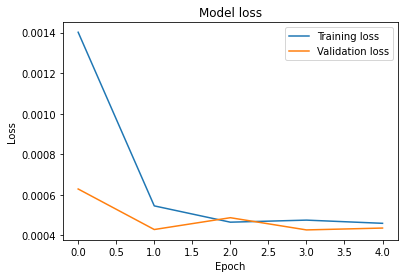

In [ ]:
def show_stats (hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title("Model loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Training loss","Validation loss"])
    plt.show()

show_stats (hist)

Root mean square error on test data: 0.2646357711408426


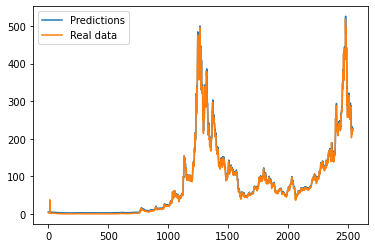

In [ ]:
predictions = model.predict(x_test)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print ("Root mean square error on test data:", rmse)    
plt.plot(predictions*factor[22] + shift[22])
plt.plot(y_test*factor[22] + shift[22])    
plt.legend(["Predictions","Real data"])
plt.show()

**Applying Prophet**

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


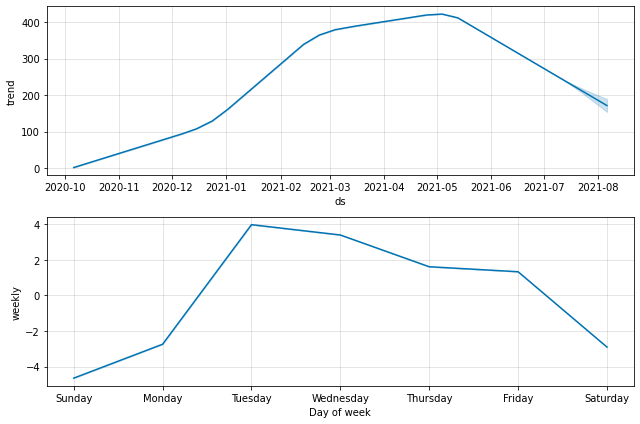

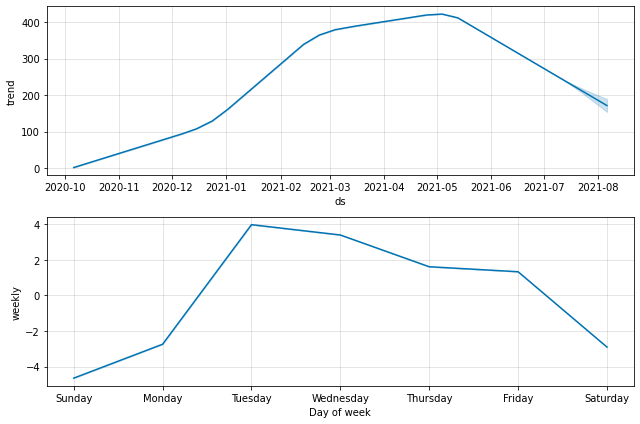

In [ ]:
# INPUT_FILE = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Aave.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)
from fbprophet import Prophet
df = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Aave.csv', parse_dates=['Date'], usecols=["Date","Close"])
df.columns = ["ds", "y"]

m = Prophet()
m.fit(df);
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

m.plot_components(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


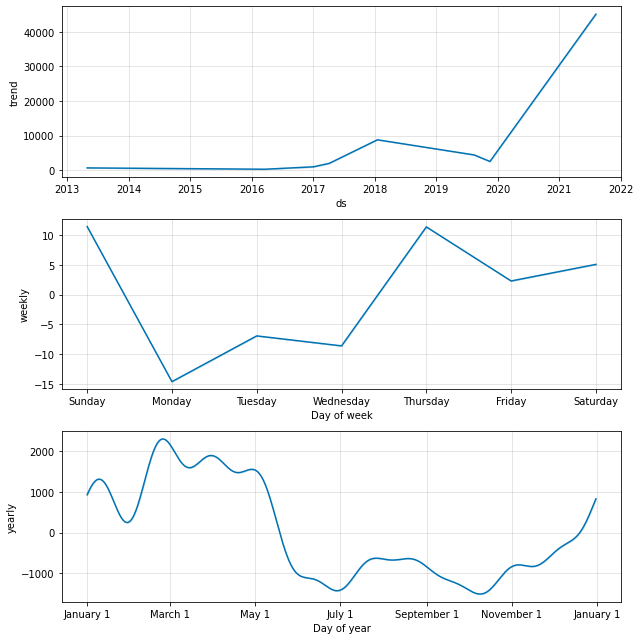

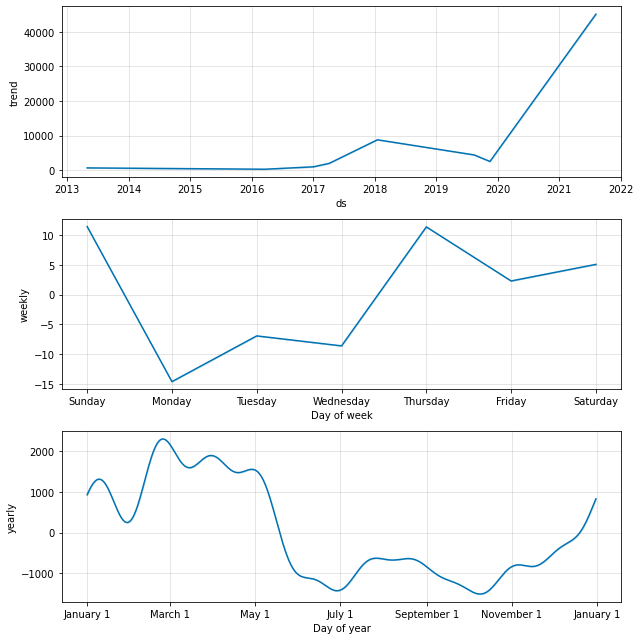

In [ ]:
# INPUT_FILE = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Bitcoin.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)
from fbprophet import Prophet
df = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Bitcoin.csv', parse_dates=['Date'], usecols=["Date","Close"])
df.columns = ["ds", "y"]

m = Prophet()
m.fit(df);
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

m.plot_components(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


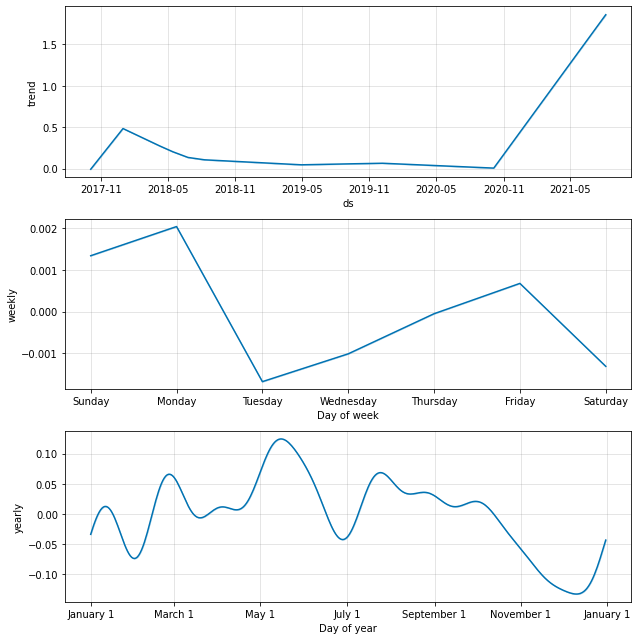

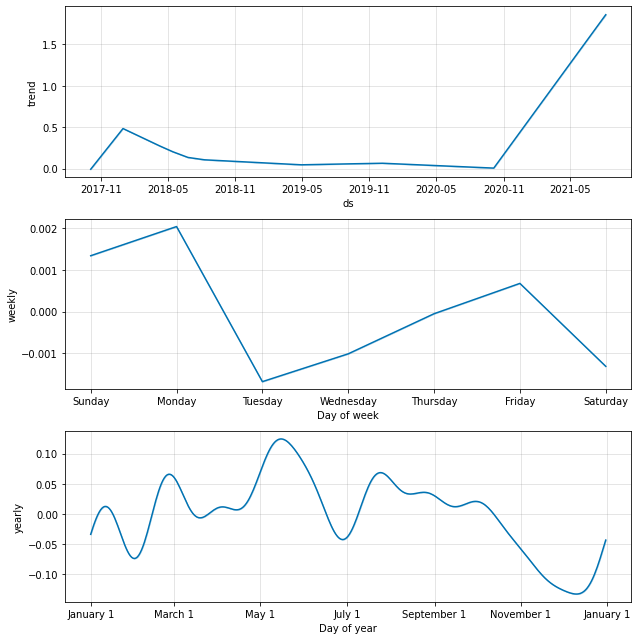

In [ ]:
# INPUT_FILE = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Cardano.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)
from fbprophet import Prophet
df = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Cardano.csv', parse_dates=['Date'], usecols=["Date","Close"])
df.columns = ["ds", "y"]

m = Prophet()
m.fit(df);
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

m.plot_components(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


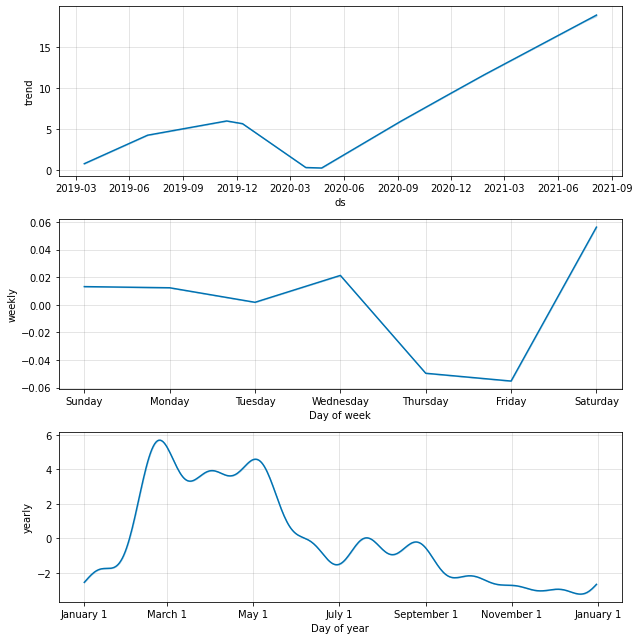

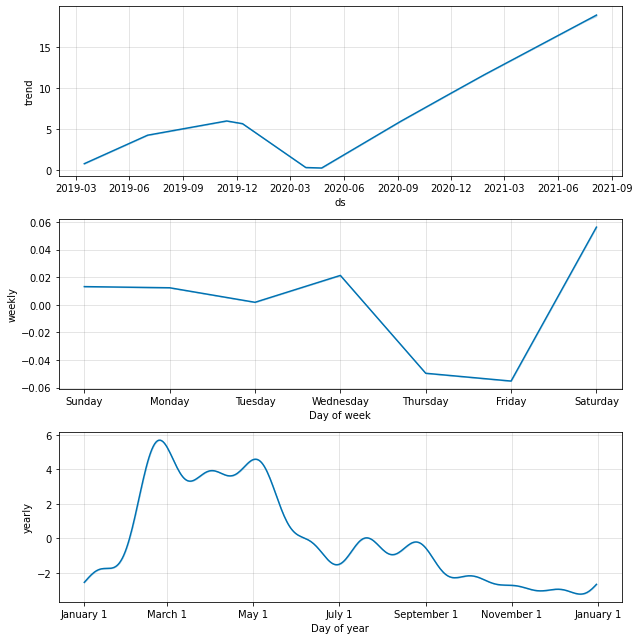

In [ ]:
# INPUT_FILE = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Cosmos.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)
from fbprophet import Prophet
df = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Cosmos.csv', parse_dates=['Date'], usecols=["Date","Close"])
df.columns = ["ds", "y"]

m = Prophet()
m.fit(df);
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

m.plot_components(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


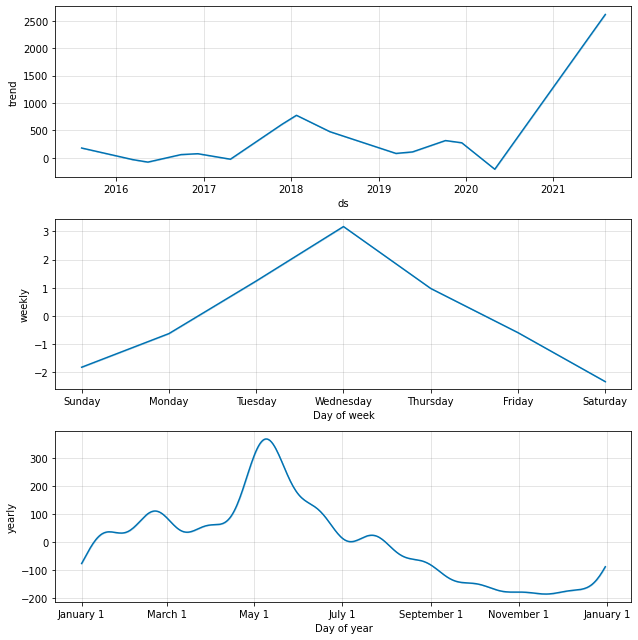

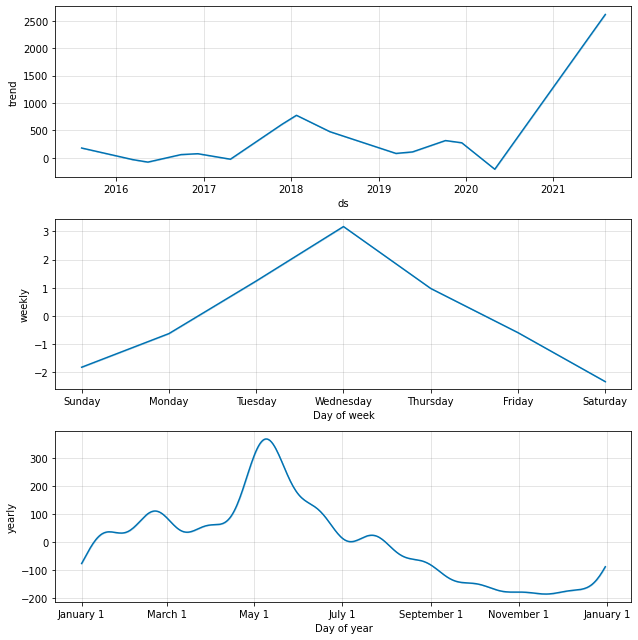

In [ ]:
# INPUT_FILE = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Cosmos.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)
from fbprophet import Prophet
df = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Ethereum.csv', parse_dates=['Date'], usecols=["Date","Close"])
df.columns = ["ds", "y"]

m = Prophet()
m.fit(df);
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

m.plot_components(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


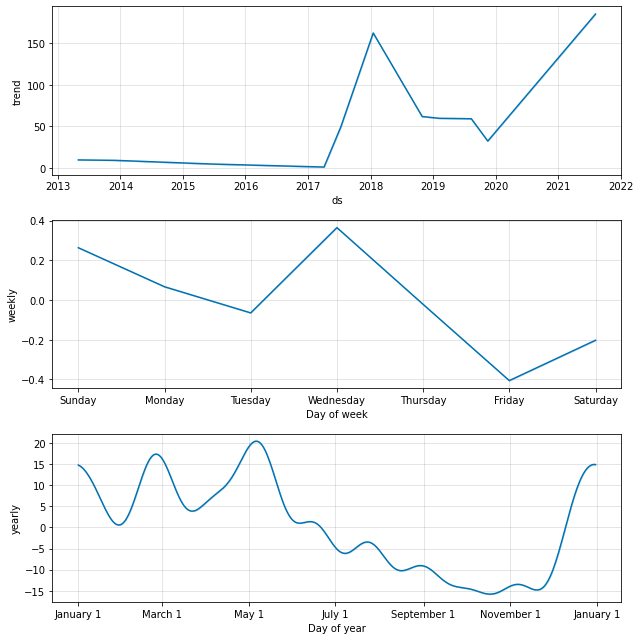

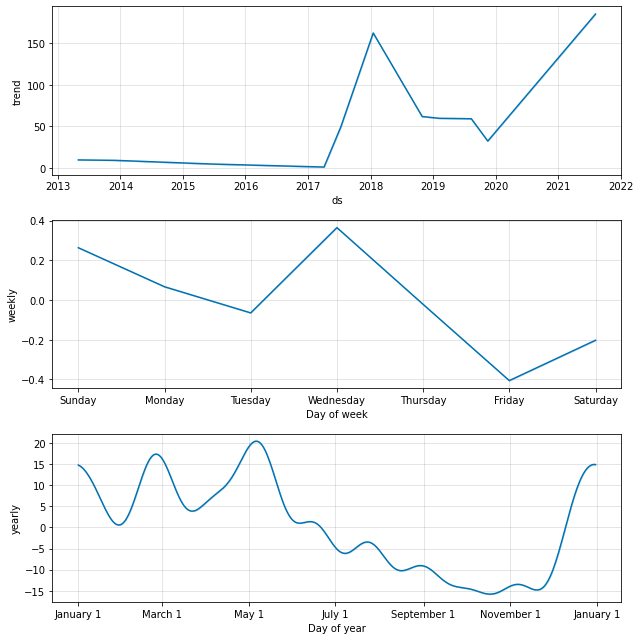

In [ ]:
from fbprophet import Prophet
df = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Litecoin.csv', parse_dates=['Date'], usecols=["Date","Close"])
df.columns = ["ds", "y"]

m = Prophet()
m.fit(df);
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

m.plot_components(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


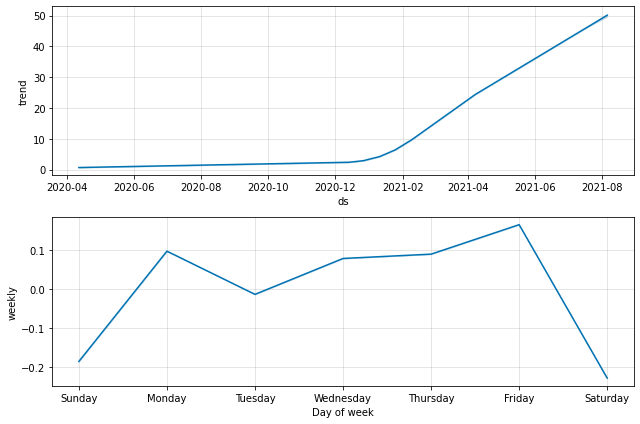

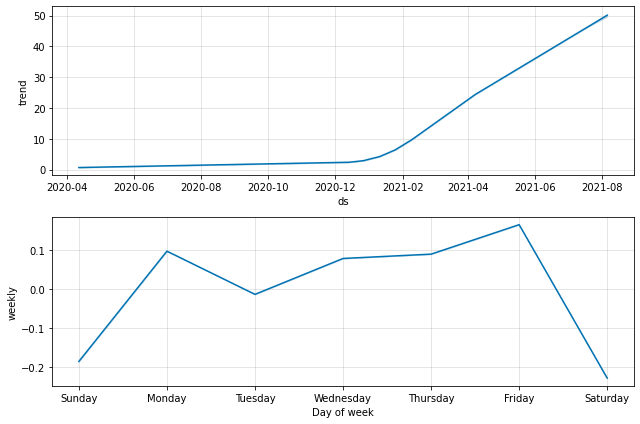

In [ ]:
from fbprophet import Prophet
df = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Solana.csv', parse_dates=['Date'], usecols=["Date","Close"])
df.columns = ["ds", "y"]

m = Prophet()
m.fit(df);
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

m.plot_components(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


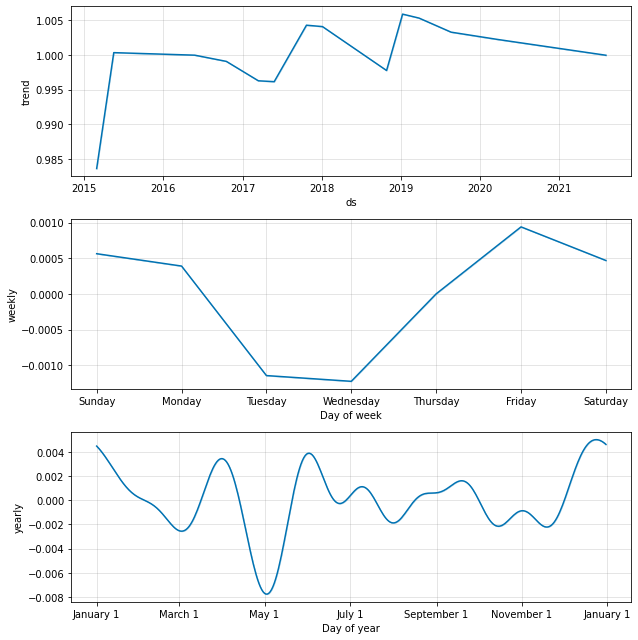

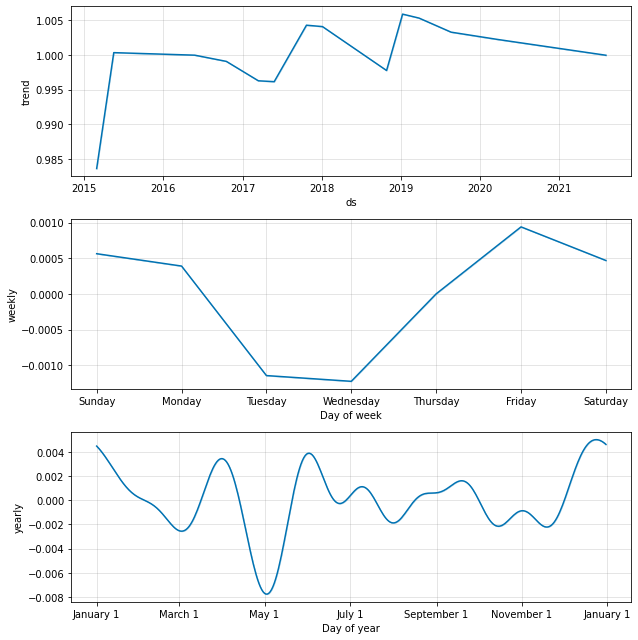

In [ ]:
from fbprophet import Prophet
df = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Tether.csv', parse_dates=['Date'], usecols=["Date","Close"])
df.columns = ["ds", "y"]

m = Prophet()
m.fit(df);
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

m.plot_components(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


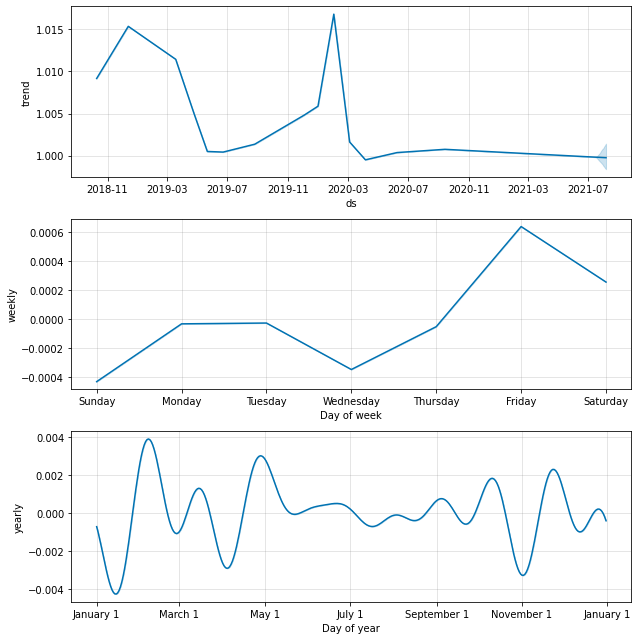

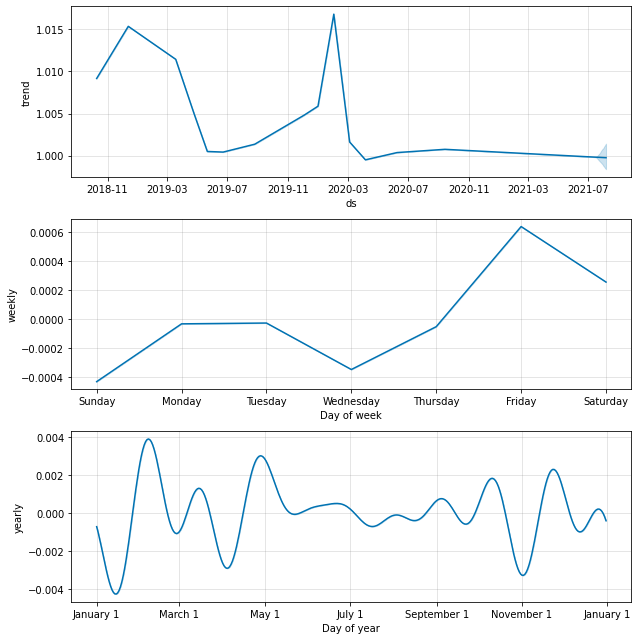

In [ ]:
from fbprophet import Prophet
df = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_USDCoin.csv', parse_dates=['Date'], usecols=["Date","Close"])
df.columns = ["ds", "y"]

m = Prophet()
m.fit(df);
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

m.plot_components(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


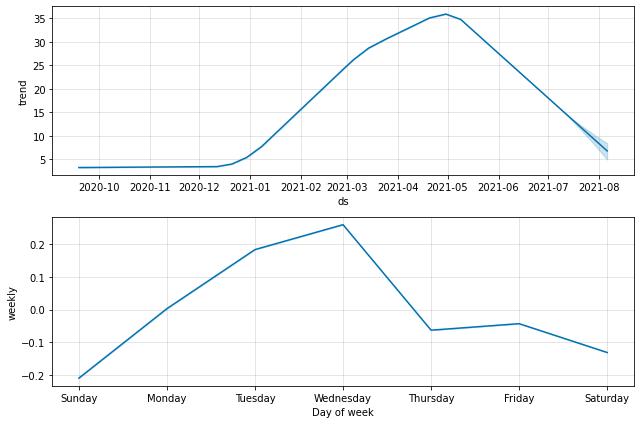

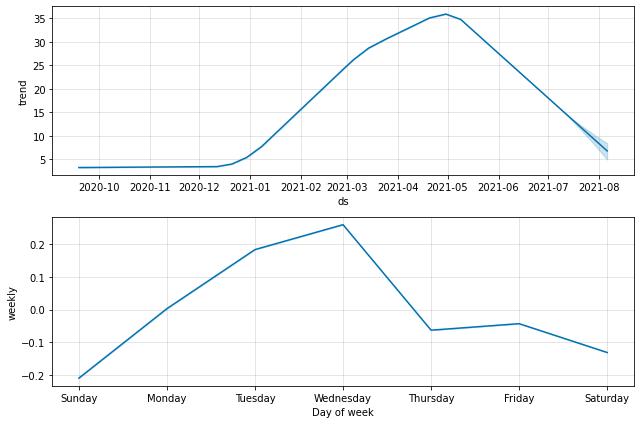

In [ ]:
from fbprophet import Prophet
df = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Uniswap.csv', parse_dates=['Date'], usecols=["Date","Close"])
df.columns = ["ds", "y"]

m = Prophet()
m.fit(df);
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

m.plot_components(forecast)